# Luchs und Hase, Räuber-Beutedynamik, predator prey dynamics

The respective equations of motion are two coupled first order differential equations of degree 1:
\begin{align}
\dot{x}(t)&=x(t)-x(t)y(t)\\
\dot{y}(t)&=-y(t)+x(t)y(t)
\end{align}

In [1]:
# What it needs i.t.o. libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# This is the callable for odeint that carries the differential equation system
def func(r,t):
    # The function need exactly two arguments, where r is a list of dependet variables and 
                # t is a list instants in time where we want to have a solution for the r
    x,y=r          # cast the input list into two variables
    dxdt=+x-x*y-x**2*y**2   # the first equation
    dydt=-y+x*y+x**2*y**2   # the second eqution
    #dxdt= y+x*(1.0-x**2-y**2) #wie im Buch von V.I.Arnol'd
    #dydt=-x+y*(1.0-x**2-y**2)
    return dxdt,dydt # return the left hand sides

<IPython.core.display.Javascript object>


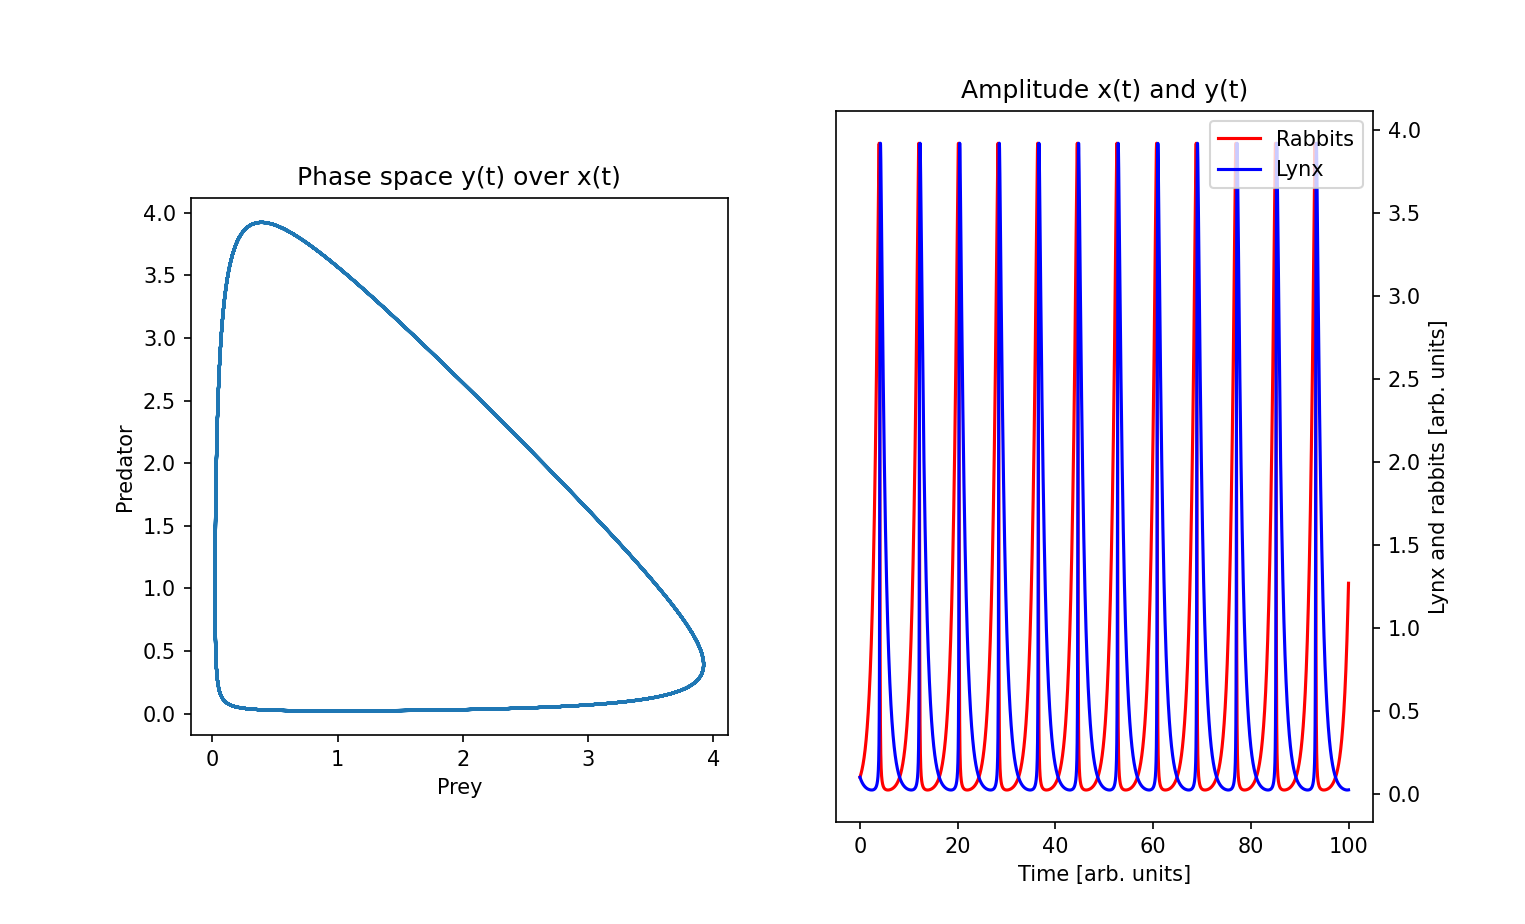

In [3]:
%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(1,2) # Let's make two subplot side by side addressed by ax1 ans ax2
r0=(0.1,0.1) # initial conditions
t=np.linspace(0,100,10000) # time interval and sampling points
pos=odeint(func,r0,t)      # solve the initial value problem, we get back a list of two arrays, x and y
x=pos[:,0]                 # Let's cast them into x and y
y=pos[:,1]
#
ax1.set_title('Phase space y(t) over x(t)') # This sets the title of the left plot
ax1.set_aspect(1)       # set the aspect ratio of the graph
ax1.set_xlabel("Prey")        # Labeling of axes
ax1.set_ylabel("Predator")
ax1.plot(x,y)
# Same game for the amplitudes
ax2.set_title('Amplitude x(t) and y(t)') # This sets the title of the left plot
#ax2.set_aspect(4)       # set the aspect ratio of the graph
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("Time [arb. units]")
ax2.set_ylabel("Lynx and rabbits [arb. units]")
ax2.plot(t,x,'r',label="Rabbits")
ax2.plot(t,y,'b',label="Lynx")
ax2.legend()